# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
airbnb = pd.read_csv('airbnb_hw.csv')
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
# Display unique values in the 'Price' column before cleaning.
print("Unique values in 'Price' before cleaning:", airbnb['Price'].unique(),'\n')

# Clean the 'Price' variable by removing '$' and ',' and converting to numeric, coercing errors to NaN.
airbnb['Price'] = airbnb['Price'].astype(str).str.replace('[$,]', '', regex=True)
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

# Calculate the number of missing values after cleaning.
missing_prices_count = airbnb['Price'].isnull().sum()

print(f"Number of missing values in the cleaned 'Price' variable: {missing_prices_count}")

Unique values in 'Price' before cleaning: [  145    37    28   199   549   149   250    90   270   290   170    59
    49    68   285    75   100   150   700   125   175    40    89    95
    99   499   120    79   110   180   143   230   350   135    85    60
    70    55    44   200   165   115    74    84   129    50   185    80
   190   140    45    65   225   600   109  1990    73   240    72   105
   155   160    42   132   117   295   280   159   107    69   239   220
   399   130   375   585   275   139   260    35   133   300   289   179
    98   195    29    27    39   249   192   142   169  1000   131   138
   113   122   329   101   475   238   272   308   126   235   315   248
   128    56   207   450   215   210   385   445   136   247   118    77
    76    92   198   205   299   222   245   104   153   349   114   320
   292   226   420   500   325   307    78   265   108   123   189    32
    58    86   219   800   335    63   229   425    67    87  1200   158
   650   

In [ ]:
police = pd.read_csv('mn_police_use_of_force.csv')
police.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [ ]:
# Display unique values and value counts in the 'subject_injury' column before cleaning.
print("Unique values in 'subject_injury' before cleaning:", police['subject_injury'].unique(),'\n')
print("Value counts in 'subject_injury' (including NaN) before cleaning:\n", police['subject_injury'].value_counts(dropna=False), '\n')

# Replace missing values with 'Unknown'.
police_new= police.dropna(subset=['subject_injury'])

# Display unique values and value counts in the 'subject_injury' column after cleaning.
print("Unique values in 'subject_injury' after cleaning:", police_new['subject_injury'].unique(),'\n')
print("Value counts in 'subject_injury' (excluding NaN) after cleaning:\n", police_new['subject_injury'].value_counts(dropna=False), '\n')

# Cross-tabulate the cleaned 'subject_injury' variable with 'force_type'.
cross_tab = pd.crosstab(police['subject_injury_cleaned'], police['force_type'], margins=True, margins_name='Total')
print("Cross-tabulation of cleaned 'subject_injury' and 'force_type':\n", cross_tab)

Unique values in original 'subject_injury': [nan 'No' 'Yes'] 

Value counts in original 'subject_injury' (including NaN):
 subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64 

Unique values in original 'subject_injury': ['No' 'Yes'] 

Value counts in original 'subject_injury' (excluding NaN):
 subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

Cross-tabulation of cleaned 'subject_injury' and 'force_type':
 force_type              Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_cleaned                                                    
No                          0          1093                131        2   
Unknown                     2          7051               1421        0   
Yes                         2          1286                 41        0   
Total                       4          9430               1593        2   

force_type              Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury_clean

In [ ]:
justice = pd.read_parquet('justice_data.parquet')
justice.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [ ]:
# Display unique values in the 'WhetherDefendantWasReleasedPretrial' column before cleaning.
print("Unique values in 'WhetherDefendantWasReleasedPretrial' before cleaning:", justice['WhetherDefendantWasReleasedPretrial'].unique(), '\n')

# Replace specified missing values with np.nan.
justice['WhetherDefendantWasReleasedPretrial'] = justice['WhetherDefendantWasReleasedPretrial'].replace([99, ''], np.nan)

print("Unique values in 'WhetherDefendantWasReleasedPretrial' after cleaning:", justice['WhetherDefendantWasReleasedPretrial'].unique(), '\n')
print("Number of missing values in 'WhetherDefendantWasReleasedPretrial' after cleaning:", justice['WhetherDefendantWasReleasedPretrial'].isnull().sum(), '\n')

# Display unique values in the 'ImposedSentenceAllChargeInContactEvent' column before cleaning and 'SentenceTypeAllChargesAtConvictionInContactEvent' column.
print("Unique values in 'ImposedSentenceAllChargeInContactEvent' before cleaning:", justice['ImposedSentenceAllChargeInContactEvent'].unique(), '\n')
print("Unique values in 'SentenceTypeAllChargesAtConvictionInContactEvent':", justice['SentenceTypeAllChargesAtConvictionInContactEvent'].unique(), '\n')

# Replace values in 'ImposedSentenceAllChargeInContactEvent' that represent missing/not applicable based on the 'SentenceTypeAllChargesAtConvictionInContactEvent' variable.
justice['ImposedSentenceAllChargeInContactEvent'] = justice['ImposedSentenceAllChargeInContactEvent'].replace([99999, ''], np.nan)

# Display unique and missing values the 'subject_injury' column after cleaning.
print("Unique values in 'ImposedSentenceAllChargeInContactEvent' after cleaning:", justice['ImposedSentenceAllChargeInContactEvent'].unique(), '\n')
print("Number of missing values in 'ImposedSentenceAllChargeInContactEvent' after cleaning:", justice['ImposedSentenceAllChargeInContactEvent'].isnull().sum(), '\n')

Unique values in 'WhetherDefendantWasReleasedPretrial' before cleaning: [9 0 1] 

Unique values in 'WhetherDefendantWasReleasedPretrial' after cleaning: [9 0 1] 

Number of missing values in 'WhetherDefendantWasReleasedPretrial' after cleaning: 0 

Unique values in 'ImposedSentenceAllChargeInContactEvent' before cleaning: [' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102'

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [9]:
shark = pd.read_excel('GSAF5.xls')
shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Description of 'Year' after initial cleaning:
 count    7040.000000
mean     1935.621449
std       271.221061
min         0.000000
25%      1948.000000
50%      1986.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64 

Number of attacks since 1940: 5507


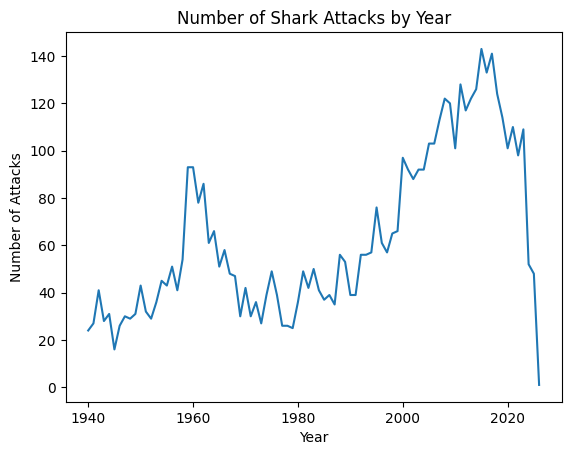

In [10]:
# Drop columns that do not contain any data.
shark.dropna(axis=1, how='all', inplace=True)

# Convert 'Year' to integer, coercing errors to NaN.
shark['Year'] = pd.to_numeric(shark['Year'], errors='coerce')
print("Description of 'Year' after initial cleaning:\n", shark['Year'].describe(), '\n')

# Filter the rows to focus on attacks since 1940.
shark_since_1940 = shark[shark['Year'] >= 1940].copy()

print(f"Number of attacks since 1940: {len(shark_since_1940)}")

# Group by year and count the occurrences to check if attacks are increasing, decreasing, or remaining constant over time.
attacks_by_year = shark_since_1940['Year'].value_counts().sort_index()

# Visualize the trend of shark attacks since 1940.
attacks_by_year.plot(kind='line')
plt.title('Number of Shark Attacks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

# It appears the number of shark attacks since 1940 are increasing over time.


Unique values in 'Age' before cleaning: ['?' '63' '9' '39' '19' '7' '85' '69' '18' '66' '21' '40' '37' '16' '20'
 '12' '42' '26' '14' '45' '30' '30+' '56' '40+' '29' 35 58 29 24 20 55 17
 12 37 36 23 40 28 69 48 '60+' 57 45 61 27 38 16 68 33 30 15 41 14 43 26
 'Middle age' 18 21 49 25 46 19 65 64 '13' nan '11' '46' '32' '10' '64'
 '62' '22' '15' '52' '44' '47' '55' '59' '8' '50' '34' '38' '30s' '20/30'
 '35' '65' '20s' '77' '60' '49' '!2' '24' '73' '25' '50s' '58' '67' '17'
 '6' '41' '53' '68' '43' '51' '31' 39 51 10 13 60 '40s' 62 'teen' 8 22 32
 56 'Teen' 42 50 'M' 9 31 11 34 '!6' '!!' 47 7 71 59 53 54 75 '45 and 15'
 73 52 70 4 63 44 '28 & 22' '22, 57, 31' '60s' "20's" 67 74 '9 & 60'
 'a minor' 6 3 82 '40?' 66 72 '23' '36' '71' '48' '70' '18 months' '57'
 '28' '33' '61' '74' '27' '3' '28 & 26' '5' '54' '86' '18 or 20'
 '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' 77 '36 & 26' '8 or 10' 84
 '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' '33 or 37' 'mid-30s' '23 & 20' 5
 ' 30' '7      &    31' '

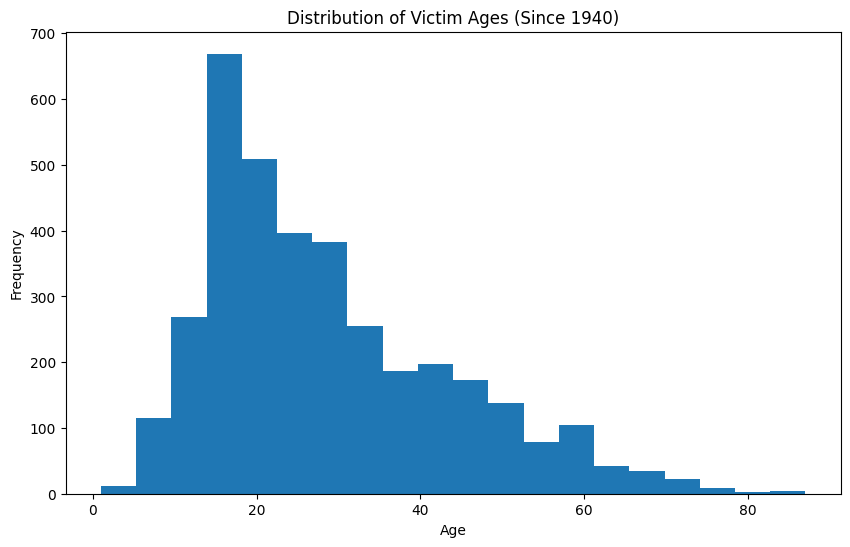

Number of missing values in cleaned 'Age': 1907



In [11]:
# Display unique values in the 'Age' column before cleaning.
print("\nUnique values in 'Age' before cleaning:", shark_since_1940['Age'].unique(), '\n')

# Convert 'Age' to numeric, coercing errors to NaN.
shark_since_1940['Age_cleaned'] = pd.to_numeric(shark_since_1940['Age'], errors='coerce')

# Plot a histogram of the cleaned 'Age'.
plt.figure(figsize=(10, 6))
plt.hist(shark_since_1940['Age_cleaned'].dropna(), bins=20)
plt.title('Distribution of Victim Ages (Since 1940)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print(f"Number of missing values in cleaned 'Age': {shark_since_1940['Age_cleaned'].isnull().sum()}\n")

In [18]:
# Display unique values and value counts in the 'Sex' column before cleaning.
print("Unique values in 'Sex' before cleaning:", shark['Sex'].unique(),'\n')
print("Value counts in 'Sex' (including NaN) before cleaning:\n", shark['Sex'].value_counts(dropna=False), '\n')

# Reformat values in the 'Sex' column.
shark['Sex'] = shark['Sex'].replace({
    'M ': 'M',
    'F ': 'F',
    ' M': 'M',
    'm': 'M',
    'lli': np.nan,
    'N': np.nan,
    '.': np.nan,
    "M x 2": 'M'
})

# Display unique values and value counts in the 'Sex' column after cleaning.
print("Unique values in 'Sex' after cleaning:", shark['Sex'].unique(),'\n')
print("Value counts in 'Sex' (including NaN) after cleaning:\n", shark['Sex'].value_counts(dropna=False), '\n')

# Count the proportion of male victms.
male_count = shark['Sex'].str.contains("M", na=False).sum()
total_count = shark['Sex'].notna().sum()
male_proportion = male_count / total_count

print(male_proportion)

Sex
M    5653
F     806
Name: count, dtype: int64
['M' 'F' nan]
['M' 'F' nan]
Sex
M      5653
F       806
NaN     583
Name: count, dtype: int64 

0.8752128812509676


In [ ]:
# Load the shark attack data
shark = pd.read_excel('GSAF5.xls')

# Drop columns that do not contain any data (all NaN values)
shark.dropna(axis=1, how='all', inplace=True)

# Clean the 'Year' variable
# Convert 'Year' to integer, coercing errors to NaN
shark['Year'] = pd.to_numeric(shark['Year'], errors='coerce')

# Describe the range of values in the cleaned 'Year' variable
print("Description of 'Year' after initial cleaning:\n", shark['Year'].describe(), '\n')

# Filter the rows to focus on attacks since 1940
shark_since_1940 = shark[shark['Year'] >= 1940].copy()

print(f"Number of attacks since 1940: {len(shark_since_1940)}")

# To check if attacks are increasing, decreasing, or remaining constant over time,
# we would typically group by year and count the occurrences, then visualize or analyze the trend.
# Let's do that briefly:
attacks_by_year = shark_since_1940['Year'].value_counts().sort_index()

print("\nNumber of attacks per year (since 1940):\n", attacks_by_year.tail()) # Displaying tail for brevity

# To visually inspect for trends, you could plot this:
# attacks_by_year.plot(kind='line', figsize=(12, 6))
# plt.title('Number of Shark Attacks per Year (Since 1940)')
# plt.xlabel('Year')
# plt.ylabel('Number of Attacks')
# plt.show()

# Based on the data or plot, you can then comment on the trend.
# A simple check for trend: compare counts in early vs. late years in the filtered data.
# This is just a rough indicator; formal time series analysis would be more rigorous.


# Clean the 'Age' variable and make a histogram
print("\nUnique values in 'Age' before cleaning:", shark_since_1940['Age'].unique(), '\n')
# Convert 'Age' to numeric, coercing errors to NaN.
# This will handle non-numeric entries like 'teen', 'adult', '?', etc.
shark_since_1940['Age_cleaned'] = pd.to_numeric(shark_since_1940['Age'], errors='coerce')

# Plot a histogram of the cleaned 'Age'
plt.figure(figsize=(10, 6))
plt.hist(shark_since_1940['Age_cleaned'].dropna(), bins=20)
plt.title('Distribution of Victim Ages (Since 1940)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print(f"Number of missing values in cleaned 'Age': {shark_since_1940['Age_cleaned'].isnull().sum()}\n")


# What proportion of victims are male?
# Clean the 'Sex ' variable (note the space in the column name)
print("Unique values in 'Sex ' before cleaning:", shark_since_1940['Sex '].unique(), '\n')
# Standardize 'M' and 'F', treat other values (including NaN) as Unknown
shark_since_1940['Sex_cleaned'] = shark_since_1940['Sex '].str.strip().replace({'M': 'Male', 'F': 'Female'})
shark_since_1940['Sex_cleaned'] = shark_since_1940['Sex_cleaned'].replace(['.', 'N'], 'Unknown') # Handle other non-standard entries
shark_since_1940['Sex_cleaned'] = shark_since_1940['Sex_cleaned'].fillna('Unknown')

male_proportion = (shark_since_1940['Sex_cleaned'] == 'Male').sum() / len(shark_since_1940)
print(f"Proportion of victims who are male: {male_proportion:.2f}\n")
print("Value counts for cleaned 'Sex':\n", shark_since_1940['Sex_cleaned'].value_counts(), '\n')


# Clean the 'Type' variable
print("Unique values in 'Type' before cleaning:", shark_since_1940['Type'].unique(), '\n')
# Standardize 'Provoked' and 'Unprovoked', treat others as 'Unknown'
shark_since_1940['Type_cleaned'] = shark_since_1940['Type'].str.strip()
shark_since_1940['Type_cleaned'] = shark_since_1940['Type_cleaned'].apply(lambda x: x if x in ['Provoked', 'Unprovoked'] else 'Unknown')

unprovoked_proportion = (shark_since_1940['Type_cleaned'] == 'Unprovoked').sum() / len(shark_since_1940)
print(f"Proportion of attacks that are unprovoked: {unprovoked_proportion:.2f}\n")
print("Value counts for cleaned 'Type':\n", shark_since_1940['Type_cleaned'].value_counts(), '\n')


# Clean the 'Fatal Y/N' variable
print("Unique values in 'Fatal Y/N' before cleaning:", shark_since_1940['Fatal Y/N'].unique(), '\n')
# Standardize 'Y' and 'N', treat others as 'Unknown' (including NaN)
shark_since_1940['Fatal_cleaned'] = shark_since_1940['Fatal Y/N'].str.strip().replace({'Y': 'Y', 'N': 'N'})
shark_since_1940['Fatal_cleaned'] = shark_since_1940['Fatal_cleaned'].apply(lambda x: x if x in ['Y', 'N'] else 'Unknown')


print("Value counts for cleaned 'Fatal Y/N':\n", shark_since_1940['Fatal_cleaned'].value_counts(), '\n')


# Analysis: likelihood of unprovoked attacks on men vs. women, fatality by type and sex
# Unprovoked attacks by sex
unprovoked_by_sex = pd.crosstab(shark_since_1940['Sex_cleaned'], shark_since_1940['Type_cleaned'])
print("Cross-tabulation of cleaned 'Sex' and 'Type':\n", unprovoked_by_sex, '\n')

# Fatality by attack type
fatality_by_type = pd.crosstab(shark_since_1940['Type_cleaned'], shark_since_1940['Fatal_cleaned'])
print("Cross-tabulation of cleaned 'Type' and 'Fatal Y/N':\n", fatality_by_type, '\n')

# Fatality by victim sex
fatality_by_sex = pd.crosstab(shark_since_1940['Sex_cleaned'], shark_since_1940['Fatal_cleaned'])
print("Cross-tabulation of cleaned 'Sex' and 'Fatal Y/N':\n", fatality_by_sex, '\n')

# Based on these tables, you can compare proportions (e.g., proportion of 'Male' that are 'Unprovoked' vs. 'Female' that are 'Unprovoked').
# For example, to get the proportion of unprovoked attacks that are male:
# print(f"Proportion of unprovoked attacks that are male: {unprovoked_by_sex.loc['Male', 'Unprovoked'] / unprovoked_by_sex['Unprovoked'].sum():.2f}")


# What proportion of attacks appear to be by white sharks?
# This requires looking at the 'Species ' column (note the space)
print("Unique values in 'Species ' before cleaning (first 50):", shark_since_1940['Species '].unique()[:50], '\n')

# Convert to lowercase and check for 'white shark' or 'great white'
shark_since_1940['Species_cleaned'] = shark_since_1940['Species '].astype(str).str.lower()

# Identify rows where the species description contains 'white shark' or 'great white'
white_shark_attacks = shark_since_1940[
    shark_since_1940['Species_cleaned'].str.contains('white shark|great white', na=False)
]

proportion_white_shark = len(white_shark_attacks) / len(shark_since_1940)
print(f"Proportion of attacks appearing to be by white sharks: {proportion_white_shark:.2f}\n")

# How do you feel about sharks?
print("As an AI, I don't have feelings, but I can appreciate the important role sharks play in marine ecosystems!")

In [15]:
# Print all column names to verify the exact name of the 'Sex' column
print(shark_since_1940.columns)

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22', 'Age_cleaned'],
      dtype='object')
